# Line_Search_Cubic_Interpolation

Zibulevsky [youtube](https://www.youtube.com/watch?v=W-Rcs26oFMM)

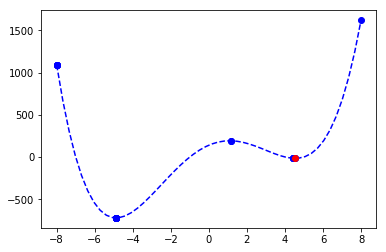

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x+7) * (x+1) * (x-4) * (x-5)

def f_prime(x):
    return (x+1)*(x-4)*(x-5)+(x+7)*(x-4)*(x-5)+(x+7)*(x+1)*(x-5)+(x+7)*(x+1)*(x-4)


def cubic_interpolation_poly_g(a, b, f_and_f_prime_vals_as_list):
    # a : left end of the interval where min point is
    # b : right end of the interval where min point is
    # f_and_f_prime_vals_as_list = [f(a), f(b), f_prime(a), f_prime(b)] 
    
    # when this function is called
    # a and b satisfy V-combination condition
    # guaranteeing there is a unique quadratic interpolation polynomial g
    
    A = np.array([[a**3, a**2, a, 1.],
                  [b**3, b**2, b, 1.],
                  [3*a**2, 2*a, 1., 0.],
                  [3*b**2, 2*b, 1., 0.]])
    d = np.array(f_and_f_prime_vals_as_list).reshape((-1,1))
    
    # return values: np.array([[cubic_coeff], [quad_coeff], [linear_coeff], [intercept]])
    return np.dot(np.linalg.inv(A), d)

def find_roots_of_g_prime(g_coeff):
    # g_coeff : coefficients of cubic polynomial g
    #           np.array([[cubic_coeff], [quad_coeff], [linear_coeff], [intercept]])
    
    # find root of g_prime and return
    a, b, c = 3*g_coeff[0,0], 2*g_coeff[1,0], g_coeff[2,0]
    det = b**2 - 4*a*c
    first_candidate = (-b + np.sqrt(det)) / (2*a)
    second_candidate = (-b - np.sqrt(det)) / (2*a)
    return first_candidate, second_candidate  

def cubic_interpolation(a, b, tol):
    
    # check V-combination condition
    if (f_prime(a) >= 0) or (f_prime(b) <= 0):
        raise ValueError("Your initial choice of a and b is bad")
        
    history_a = [a]
    history_b = [b]
    while b-a > tol:
        
        g_coeff = cubic_interpolation_poly_g(a, b, [f(a), f(b), f_prime(a), f_prime(b)])
        first_candidate, second_candidate = find_roots_of_g_prime(g_coeff) 
        
        # identify the root of g' in [a,b]
        if (a < first_candidate) and (first_candidate < b):
            candidate = first_candidate
        else:
            candidate = second_candidate
            
        if np.abs(f_prime(a)) < tol:
            sol = a
            return sol, np.array(history_a), np.array(history_b)
        if np.abs(f_prime(b)) < tol:
            sol = b
            return sol, np.array(history_a), np.array(history_b)
        if np.abs(f_prime(candidate)) < tol:
            sol = candidate
            return sol, history_a, history_b
            
        if f_prime(candidate) > 0:
            b = candidate
        else:
            a = candidate
        history_a.append(a)
        history_b.append(a)
    
    sol = (a+b)/2
    return sol, np.array(history_a), np.array(history_b)


def plot_cubic_interpolation(sol, history_a, history_b):
    a = history_a[0]
    b = history_b[0] 
    x = np.linspace(a, b)
    plt.plot(x, f(x), '--b')
    plt.plot(history_a, f(np.array(history_a)), 'ob')
    plt.plot(history_b, f(np.array(history_b)), 'ob')
    plt.plot(sol, f(sol), 'or')
    plt.show()


if __name__ == "__main__":
    a = -8.
    b = 8.
    tol = 1e-6
    
    sol, history_a, history_b = cubic_interpolation(a, b, tol)
    plot_cubic_interpolation(sol, history_a, history_b)